<a href="https://colab.research.google.com/github/fayyoz24/image_classification/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content"

drive  sample_data


In [ ]:
!cp "/content/drive/My Drive/seg_test.zip" "seg_test.zip"
!cp "/content/drive/My Drive/seg_train.zip" "seg_train.zip"
# !cp "/content/drive/MyDrive/Cat_Dog_data.zip" "Cat_Dog_data.zip"

In [ ]:
from zipfile import ZipFile
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import torch as T
from torchvision import datasets, transforms
from torch.utils.data import DataLoader 


In [ ]:
a = '/content/seg_test.zip'
b = '/content/seg_train.zip'
# c = '/content/Cat_Dog_data.zip'
with ZipFile(a) as zip:
  zip.extractall()
with ZipFile(b) as zip:
  zip.extractall()


In [ ]:
device = 'cuda' if T.cuda.is_available() else 'cpu'

print(device)

cuda


In [ ]:
train_transform = train_transforms = transforms.Compose([transforms.Resize(128),
                                       transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(100),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5],
                                                            [0.5, 0.5, 0.5])])

test_transform = transforms.Compose( [transforms.Resize(128),
                                      transforms.CenterCrop(100),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.5, 0.5, 0.5],
                                                           [0.5, 0.5, 0.5])] )

train_data = datasets.ImageFolder('/content/seg_train', transform=train_transform)
test_data = datasets.ImageFolder('/content/seg_test', transform=test_transform)

# New section

In [ ]:

trainloader = DataLoader(train_data, batch_size=32, shuffle=True)
testloader = DataLoader(test_data, batch_size=32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


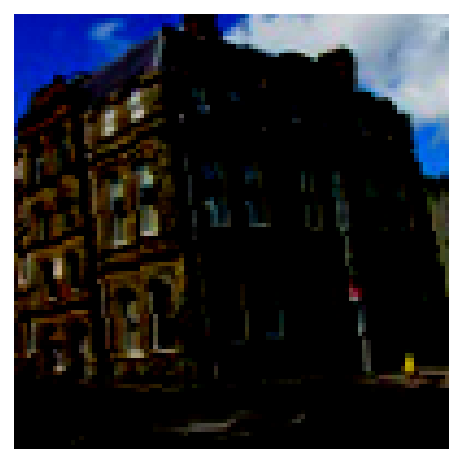

In [ ]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

# Run this to test your data loaders
images, labels = next(iter(trainloader))
imshow(images[0], normalize=False);


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1)
        self.pool = nn.MaxPool2d(3, 2)
        self.conv2 = nn.Conv2d(32, 128, 3, 1)
# 32x61952 and 100352x100
        self.fc1 = nn.Linear(22 * 22 * 128, 100)
        self.fc2 = nn.Linear(100, 6)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
       
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)
        return x

model = Net()
optimizer = T.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.NLLLoss().to(device)

In [ ]:
model.to(device)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=61952, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=6, bias=True)
)

Epoch: 1/100
	Iteration: 0	 Running Loss: 0.0448
	Iteration: 40	 Running Loss: 1.7319
	Iteration: 80	 Running Loss: 1.5775
	Iteration: 120	 Running Loss: 1.4648
	Iteration: 160	 Running Loss: 1.4439
	Iteration: 200	 Running Loss: 1.3818
	Iteration: 240	 Running Loss: 1.3348
	Iteration: 280	 Running Loss: 1.3221
	Iteration: 320	 Running Loss: 1.2966
	Iteration: 360	 Running Loss: 1.2859
	Iteration: 400	 Running Loss: 1.2558
	Iteration: 30	 Test Loss: 1.0014
	Accuracy:  0.5625
tensor([2, 2, 2, 5, 4, 2, 4, 5, 2, 2, 2, 0, 0, 5, 2, 4, 5, 2, 2, 2, 5, 2, 1, 2,
        5, 4, 2, 2, 3, 2, 2, 2], device='cuda:0')
tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0')
	Iteration: 60	 Test Loss: 1.3354
	Accuracy:  0.4375
tensor([3, 3, 3, 4, 3, 3, 0, 5, 3, 0, 5, 0, 4, 3, 4, 3, 2, 3, 0, 3, 0, 3, 0, 0,
        4, 0, 3, 2, 3, 0, 2, 3], device='cuda:0')
tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

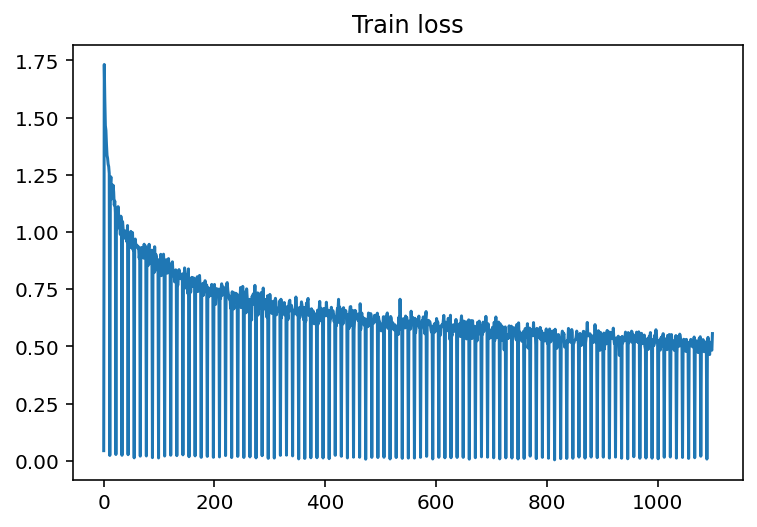

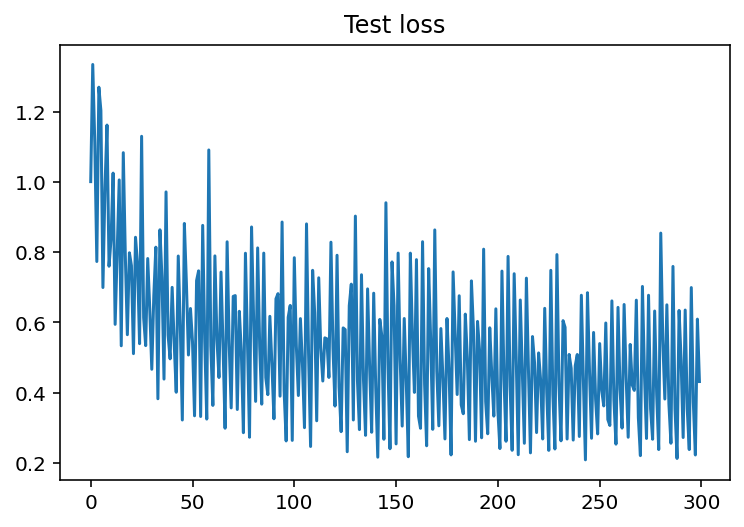

In [ ]:
epochs = 100
print_every = 40
loss_list = list()
test_loss_list = list()
for e in range(epochs):
    running_loss = 0
    print(f"Epoch: {e+1}/{epochs}")

    for i, (images, labels_t) in enumerate(iter(trainloader)):
        labels_t, images = labels_t.to(device), images.to(device)

        optimizer.zero_grad()
       
        output = model.forward(images)  
        
        loss = criterion(output, labels_t)
        loss.backward()                  
        optimizer.step()                 

        running_loss += loss.item()
        if i % print_every == 0:
          print(f"\tIteration: {i}\t Running Loss: {running_loss/print_every:.4f}")
          loss_list.append(running_loss/print_every)
          
          running_loss = 0
    model.eval()
    with T.no_grad():
      test_loss = 0
      k = 0
      for inputs, labels in iter(testloader):
        inputs, labels = inputs.to(device), labels.to(device)
        k+=1
        output_test = model.forward(inputs)
        batch_loss = criterion(output_test, labels)
        _, predicted = T.max(output_test.data, 1)
        acc_sum = T.sum(predicted == labels)
        acc = acc_sum/len(labels)
        test_loss += batch_loss.item()
        if k % 30 == 0:
          print(f"\tIteration: {k}\t Test Loss: {test_loss/30:.4f}")
          test_loss_list.append(test_loss/30)
          test_loss = 0
          print(f"\tAccuracy:  {acc}")
          print(predicted)
          print(labels)
plt.plot(loss_list)
plt.title('Train loss')
plt.show()
plt.plot(test_loss_list)
plt.title('Test loss')
plt.show()

In [ ]:
T.save(model.state_dict(), 'point.pth')

tensor([[ -0.1534, -12.0172,  -8.1602,  -3.6007,  -3.6018,  -2.4380]],
       device='cuda:0', grad_fn=<LogSoftmaxBackward0>)


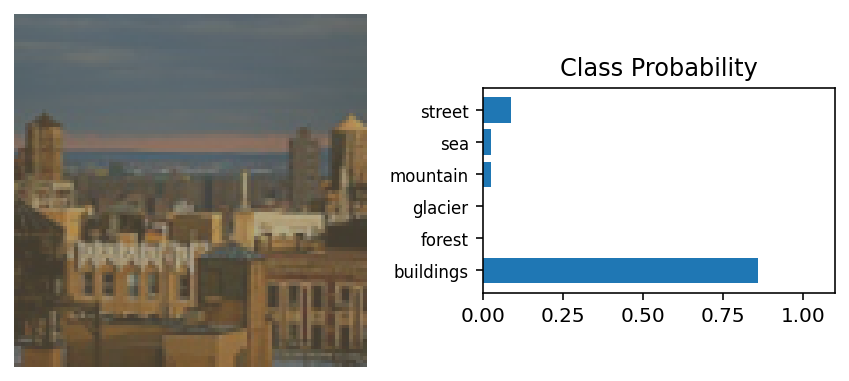

In [ ]:
import numpy as np
class_list = train_data.classes
# print(class_list)
def view_classify_general(img, ps, class_list):

    ps = ps.cpu().data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    imshow(img, ax=ax1, normalize=True)
    ax1.axis('off')
    ax2.barh(np.arange(len(class_list)), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(len(class_list)))
    ax2.set_yticklabels([x for x in class_list], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

images, labels = next(iter(testloader))
img, label = images[10], labels[10]

logits = model(img.unsqueeze(0).cuda())
print(logits)

ps = T.exp(logits)

view_classify_general(img, ps, class_list)